# Distribution Plots for Figure 1 and Supplemental Figure 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import Levenshtein as Lev
import statsmodels.discrete.discrete_model as dm
import scipy.optimize
import scipy.stats as st

import os
import warnings
from datetime import datetime

# Load in custom functions
from MM_functions import model_fit_functions as ff

# Edit to reflect your own repository location
path = 'C:/Users/perry/github_repos/mixed_model_denoising/'
os.chdir(path)

date = datetime.today().strftime('%Y-%m-%d')
print(date)

2023-10-27


### Loading data

In [2]:
# Loading in files from preprocessing notebook into dictionary

donor_files = os.listdir('./data/processed/donor_cells')
donor_file_dict = dict(zip(list(range(1,len(donor_files) + 1)), donor_files))

donor_dfs = {}
donor_sizes = {}
donor_sars2 = {}

for donor in donor_file_dict:
    donor_df = pd.read_csv('./data/processed/donor_cells/' + donor_file_dict[donor], sep = ',', index_col=0)
    donor_sizes[donor] = len(donor_df)
    donor_dfs[donor] = donor_df
    donor_sars2[donor] = donor_df['SARS-2']

In [29]:
# Loading in files from preprocessing notebook into dictionary

vrc01_files = os.listdir('./data/processed/vrc01_cells')
vrc01_file_dict = dict(zip(list(range(1,len(vrc01_files) + 1)), vrc01_files))

vrc01_dfs = {}
vrc01_sizes = {}
vrc01_sars2 = {}

for donor in vrc01_file_dict:
    vrc01_df = pd.read_csv('./data/processed/vrc01_cells/' + vrc01_file_dict[donor], sep = ',', index_col=0)
    vrc01_sizes[donor] = len(vrc01_df)
    vrc01_dfs[donor] = vrc01_df
    vrc01_sars2[donor] = vrc01_df['SARS-2']

In [4]:
lss_names = [col for col in donor_dfs[1].columns if '.LSS' in col]
umi_names = [i.split('.')[0] for i in lss_names]

In [5]:
for donor in donor_dfs:
    donor_dfs[donor] = donor_dfs[donor][umi_names].apply(lambda x:  (x >= 10))

In [6]:
ddf = pd.concat(donor_dfs)
ddf['Donor'] = ddf.index.get_level_values(0)
ddf.index = ddf.index.droplevel(0)

In [7]:
ddf = ddf.groupby('Donor').sum()

In [8]:
ddf

,CoV_HKU1,CoV_OC43,D1,D2,D3,D4,H1_NC99,H1_MI15,H3_Perth,H3_HK68,...,H7,H9,H10,RSV_A,RSV_B,MPV_A,MPV_B,PIV_3,BG505_sc,SARS-2
Donor,,,,,,,,,,,,,,,,,,,,,
1,4,1,2,0,35,24,27,25,5,3,...,8,0,1,53,56,83,72,55,333,212
2,13,8,9,6,228,131,111,121,13,7,...,20,13,3,202,150,137,122,170,1417,1165
3,27,3,73,11,4564,4158,264,130,74,30,...,119,12,15,618,1179,280,327,3035,4645,4664
4,1,0,1,1,6,7,8,2,2,1,...,2,1,1,15,6,3,4,11,193,45
5,5,1,1,4,15,9,20,6,7,4,...,7,4,4,11,9,12,10,34,120,37
6,0,0,0,0,5,4,4,3,0,0,...,1,0,0,5,4,2,3,4,122,270
7,1,0,2,0,13,20,3,2,3,0,...,2,0,0,26,20,11,8,18,67,352
8,1,0,1,1,10,7,28,37,15,4,...,8,4,4,15,6,20,20,14,76,212
9,1,0,1,0,4,1,15,6,0,0,...,2,3,0,14,8,6,5,2,163,179


In [70]:
ddf.drop(3, inplace=True)

In [75]:
example_lss = ['SARS-2', 'MPV_A',
       'RSV_A', 'H1_NC99',  'PIV_3', 
       ]

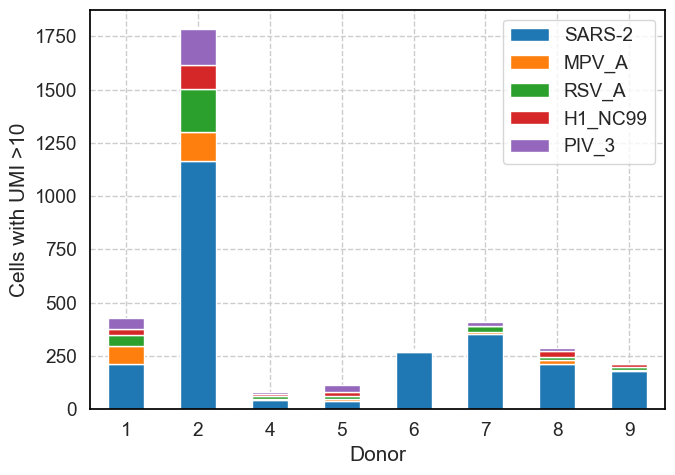

In [81]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(7,5)}, font_scale=1.25, palette='tab10', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

ddf[example_lss].plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Cells with UMI >10')

plt.tight_layout()
plt.savefig('counts_above_10_other_antigens_23-10-17.svg')



In [31]:
ddf.sum().sort_values().index.values

array(['H9.LSS', 'CoV_OC43.LSS', 'BG505_sc.LSS', 'H10.LSS', 'H3_HK68.LSS',
       'D2.LSS', 'H1_MI15.LSS', 'RSV_B.LSS', 'CoV_HKU1.LSS', 'MPV_A.LSS',
       'RSV_A.LSS', 'H5_VN04.LSS', 'H1_NC99.LSS', 'MPV_B.LSS', 'D1.LSS',
       'H3_Perth.LSS', 'PIV_3.LSS', 'D3.LSS', 'D4.LSS', 'H7.LSS',
       'SARS-2.LSS'], dtype=object)

Fig. 1e

In [9]:
ratio_df = pd.DataFrame([vrc01_sizes, donor_sizes]).T
ratio_df.columns = ['VRC01', 'Donor']

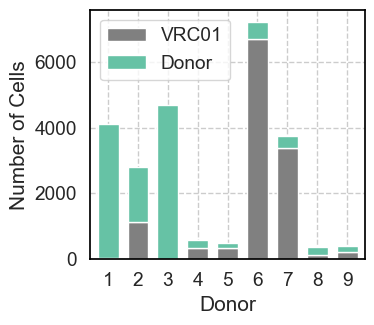

In [11]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(4,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

ax = ratio_df.plot.bar(stacked=True, width=0.7 ,color=[ 'grey', sns.color_palette()[0]]) #
plt.ylabel('Number of Cells')
plt.xlabel('Donor')
plt.xticks(rotation=0)

# plt.ylim(0,7200)

plt.tight_layout()
plt.savefig('fig2e.svg')

### Looking at Donor 2 for Figure 1

In [73]:
donor_df, vrc01_df = donor_dfs[2], vrc01_dfs[2]

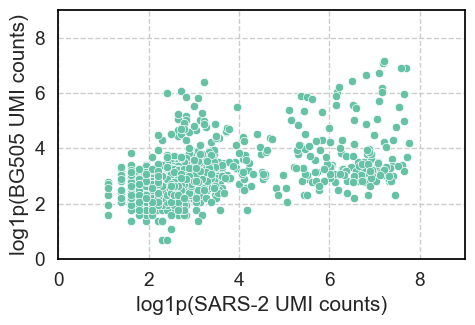

In [74]:
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.scatterplot(x=np.log1p(donor_df['SARS-2']), y=np.log1p(donor_df['BG505_sc']))
plt.xlim(0,9)
plt.ylim(0,9)

plt.xlabel('log1p(SARS-2 UMI counts)')
plt.ylabel('log1p(BG505 UMI counts)')

plt.tight_layout()

plt.savefig('fig2c.svg')

In [75]:
np.corrcoef(np.log1p(donor_df['SARS-2']), np.log1p(donor_df['BG505_sc']))

array([[1.        , 0.48176559],
       [0.48176559, 1.        ]])

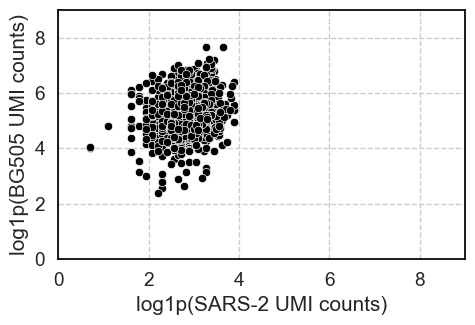

In [76]:
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.scatterplot(x=np.log1p(vrc01_df['SARS-2']), y=np.log1p(vrc01_df['BG505_sc']), color='black')
plt.xlim(0,9)
plt.ylim(0,9)

plt.xlabel('log1p(SARS-2 UMI counts)')
plt.ylabel('log1p(BG505 UMI counts)')

plt.tight_layout()

plt.savefig('fig2d.svg')

In [77]:
np.corrcoef(np.log1p(vrc01_df['SARS-2']), np.log1p(vrc01_df['BG505_sc']))

array([[1.        , 0.20806994],
       [0.20806994, 1.        ]])

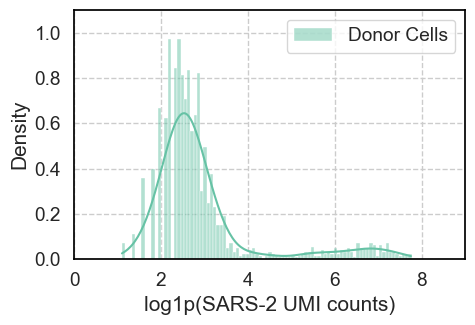

In [78]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.histplot(np.log1p(donor_df['SARS-2']), binwidth=0.075, stat='density', label = 'Donor Cells', color = sns.color_palette()[0], kde=True, bins=500)
plt.legend()
plt.xlabel('log1p(SARS-2 UMI counts)')
plt.xlim(0,9)
plt.ylim(0,1.1)

plt.tight_layout()

plt.savefig('fig2a.svg')

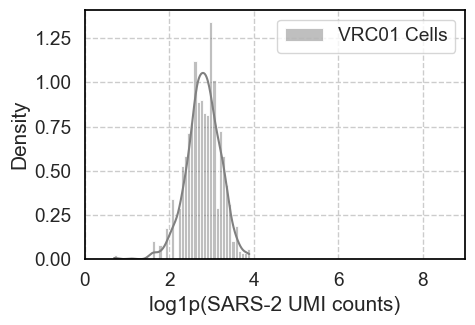

In [81]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.histplot(np.log1p(vrc01_df['SARS-2']), binwidth=0.075, color='grey', stat='density', label = 'VRC01 Cells', kde=True)
plt.legend()
plt.xlim(0,9)
plt.xlabel('log1p(SARS-2 UMI counts)')

plt.tight_layout()

plt.savefig('fig2b.svg')

In [12]:
sars2_df_donor = pd.DataFrame(donor_sars2)
sars2_df_donor = np.log1p(sars2_df_donor)

In [30]:
sars2_df_vrc01 = pd.DataFrame(vrc01_sars2)
sars2_df_vrc01.drop(3, axis=1, inplace=True)
sars2_df_vrc01 = np.log1p(sars2_df_vrc01)

In [31]:
sars2_df_donor = pd.DataFrame(donor_sars2)
sars2_df_donor = np.log1p(sars2_df_donor)
sars2_df_donor = sars2_df_donor.melt()
sars2_df_donor['Cell type'] = 'Donor'

sars2_df_vrc01 = pd.DataFrame(vrc01_sars2)
sars2_df_vrc01.drop(3, axis=1, inplace=True)
sars2_df_vrc01 = np.log1p(sars2_df_vrc01)
sars2_df_vrc01 = sars2_df_vrc01.melt()
sars2_df_vrc01['Cell type'] = 'VRC01'

sars2_df = pd.concat([sars2_df_donor, sars2_df_vrc01])

In [15]:
sars2_df = sars2_df[sars2_df['Cell type'] == 'Donor']

In [16]:
sars2_df['Donor'] = sars2_df['variable'].astype('category')

In [17]:
sars2_df.loc[98031, 'value'] = 0
sars2_df.loc[98031, 'variable'] = '3'

In [18]:
sars2_df[sars2_df['Donor'] == '3']

,variable,value,Cell type,Donor


In [19]:
sars2_df = sars2_df.reset_index()

In [20]:
sars2_df.drop_duplicates(inplace=True)

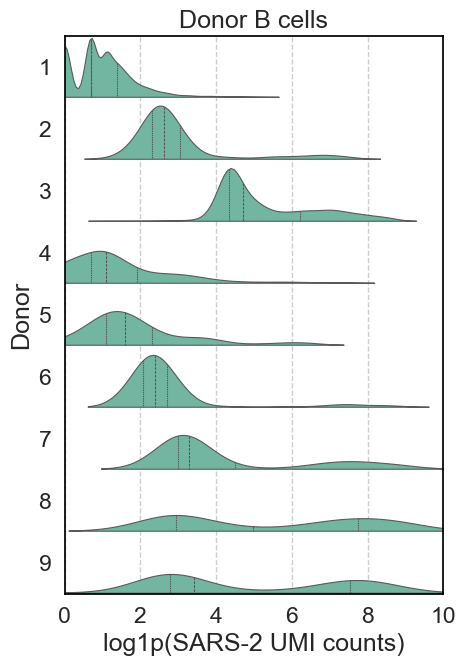

In [23]:
sns.set(rc = {'figure.figsize':(5,7)}, font_scale=1.5, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

# sns.violinplot(data = sars2_df, y ='Donor', x='value', orient='h', split=True, linewidth=0.8, width=0.9,gap=5.2, color=sns.palettes.get_color_cycle()[0])
sns.violinplot(data = sars2_df, y ='Donor', x='value', orient='h', split=True, linewidth=0.8, width=0.95,inner="quart", color=sns.palettes.get_color_cycle()[0])


plt.ylabel('Donor')
plt.xlabel('log1p(SARS-2 UMI counts)')
# sns.violinplot(data = sars2_df, x ='variable', y='value', hue='Cell type', split=True, width=1,scale="area", dodge=True, gap=5.2)

plt.xlim(0,10)
plt.title('Donor B cells')

plt.tight_layout()
plt.savefig('fig1_violin_23-10-27.png')

In [40]:
sars2_df = sars2_df[sars2_df['Cell type'] == 'VRC01']

In [41]:
sars2_df['Donor'] = sars2_df['variable'].astype(str)

In [42]:
sars2_df.loc[98031, 'value'] = 0
sars2_df.loc[98031, 'variable'] = '3'

In [43]:
sars2_df.sort_values(by='Donor', inplace=True)

In [39]:
import os
os.getcwd()

'C:\\Users\\perry\\github_repos\\mixed_model_denoising'

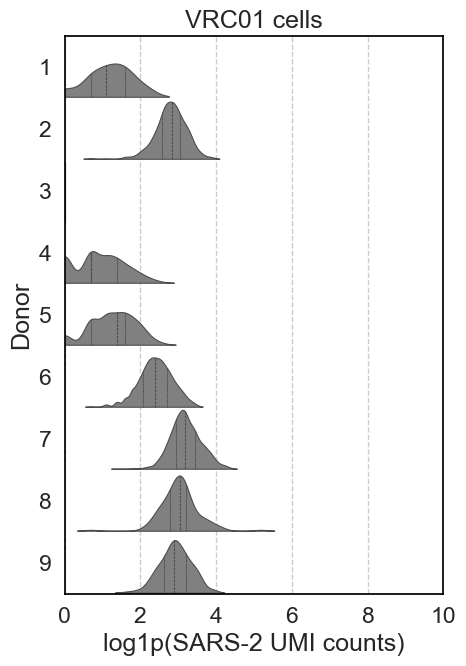

In [44]:
sns.set(rc = {'figure.figsize':(5,7)}, font_scale=1.5, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

# sns.violinplot(data = sars2_df, y ='Donor', x='value', orient='h', split=True, linewidth=0.8, width=0.9,gap=5.2, color=sns.palettes.get_color_cycle()[0])
sns.violinplot(data = sars2_df, y ='Donor', x='value', orient='h', split=True, linewidth=0.8, width=0.95,inner="quart", color='grey')


plt.ylabel('Donor')
plt.xlabel('log1p(SARS-2 UMI counts)')
# sns.violinplot(data = sars2_df, x ='variable', y='value', hue='Cell type', split=True, width=1,scale="area", dodge=True, gap=5.2)

plt.xlim(0,10)
plt.title('VRC01 cells')

plt.tight_layout()
plt.savefig('fig1_vrc01_violin_23-10-27.png')